## First Section: Loading of the Data Set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


## Second Section: Data Exploration and Data Preperation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
percentage = (df.isnull().sum() / len(df)) * 100
percentage.sort_values(ascending=False)[:10]

BCL2_N        26.388889
H3MeK4_N      25.000000
BAD_N         19.722222
EGR1_N        19.444444
H3AcK18_N     16.666667
pCFOS_N        6.944444
ELK_N          1.666667
Bcatenin_N     1.666667
MEK_N          0.648148
P38_N          0.277778
dtype: float64

In [ ]:
columns_to_drop = percentage[percentage > 10].index
columns_to_drop

Index(['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], dtype='object')

In [ ]:
df1 = df.drop(columns_to_drop, axis=1)

In [ ]:
df1.shape

(1080, 77)

Review statisctics for the following variables 'pCFOS_N', 'ELK_N' and 'Bcatenin_N'

In [ ]:
df1['pCFOS_N'].describe()

count    1005.000000
mean        0.131053
std         0.023863
min         0.085419
25%         0.113506
50%         0.126523
75%         0.143652
max         0.256529
Name: pCFOS_N, dtype: float64

In [ ]:
df1['ELK_N'].describe()

count    1062.000000
mean        1.173400
std         0.335786
min         0.497695
25%         0.944435
50%         1.096186
75%         1.323581
max         2.802948
Name: ELK_N, dtype: float64

In [ ]:
df1['Bcatenin_N'].describe()

count    1062.000000
mean        2.146550
std         0.435742
min         1.134886
25%         1.826707
50%         2.114769
75%         2.423875
max         3.680552
Name: Bcatenin_N, dtype: float64

#### Encoding categorical variables:

In [ ]:
# one hot encoder
df1 = pd.get_dummies(data=df1,columns=["Treatment","Behavior", "Genotype"])
df1.head(2)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,CaNA_N,class,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,Genotype_Control,Genotype_Ts65Dn
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,1.675652,c-CS-m,1,0,1,0,1,0
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,1.743610,c-CS-m,1,0,1,0,1,0


#### The next step is to replace null values in the variables with their respective mean values

In [ ]:
df1.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,CaNA_N,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,Genotype_Control,Genotype_Ts65Dn
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,1005.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.121521,0.131053,0.446073,1.337784,0.527778,0.472222,0.486111,0.513889,0.527778,0.472222
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.014276,0.023863,0.066432,0.317126,0.499459,0.499459,0.500039,0.500039,0.499459,0.499459
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.067254,0.085419,0.258626,0.586479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.110839,0.113506,0.398082,1.081423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.121626,0.126523,0.448459,1.317441,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.131955,0.143652,0.490773,1.585824,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.158748,0.256529,0.759588,2.129791,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2 = df1.fillna(df1.mean())

In [ ]:
df2.isnull().sum() / len(df2)

MouseID             0.0
DYRK1A_N            0.0
ITSN1_N             0.0
BDNF_N              0.0
NR1_N               0.0
                   ... 
Treatment_Saline    0.0
Behavior_C/S        0.0
Behavior_S/C        0.0
Genotype_Control    0.0
Genotype_Ts65Dn     0.0
Length: 80, dtype: float64

#### Checking for duplicates: <br>
Next, we will check if there is any duplicate data in our data set. We will create a new data frame called "duplicateRowsdf" to check and store duplicated rows in our data set. As a next step we will check for the shape of the duplicated values.

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
duplicateRowsdf = df2[df2.duplicated()]
print(duplicateRowsdf)

Empty DataFrame
Columns: [MouseID, DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, pS6_N, pCFOS_N, SYP_N, CaNA_N, class, Treatment_Memantine, Treatment_Saline, Behavior_C/S, Behavior_S/C, Genotype_Control, Genotype_Ts65Dn]
Index: []

[0 rows x 80 columns]


Next, we will apply the describe() function to obtain the summary and distribution information about our variables. As we have categorical variables, we need to use the include=object parameter in the describe() function to apply it to the qualitative data. We will do this in separate lines.

In [ ]:
df2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,CaNA_N,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C,Genotype_Control,Genotype_Ts65Dn
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.121521,0.131053,0.446073,1.337784,0.527778,0.472222,0.486111,0.513889,0.527778,0.472222
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.014276,0.023018,0.066432,0.317126,0.499459,0.499459,0.500039,0.500039,0.499459,0.499459
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.067254,0.085419,0.258626,0.586479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.110839,0.114373,0.398082,1.081423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,0.121626,0.128466,0.448459,1.317441,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.131955,0.142427,0.490773,1.585824,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.158748,0.256529,0.759588,2.129791,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.describe(include='object')

,MouseID,class
count,1080,1080
unique,1080,8
top,309_1,c-CS-m
freq,1,150


###### We are dropping the variable 'MouseID' as there is no value in this variable for our further analysis

In [ ]:
df2.drop('MouseID', axis=1, inplace=True)

#### Visualization of the distribution of categorical variables:

In [ ]:
df2['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

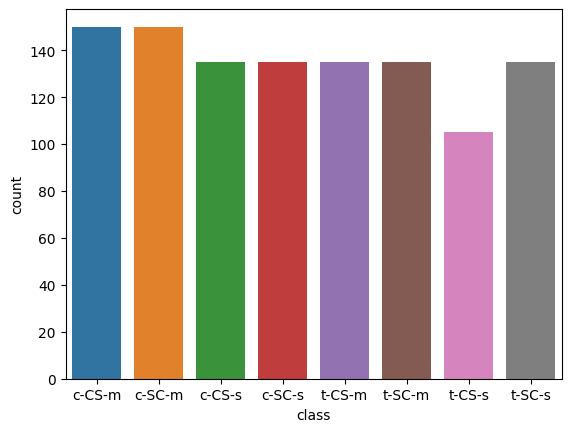

In [ ]:
sns.countplot(x='class',data=df2)

## Prepare dataset to apply Clustering algorithm and models

#### 1st step is to split the dataframe into independent variables and target data: <br>
We will create "X" including the independent variables, and variable "y1" including only the target variable "class"

In [ ]:
X = df2.drop('class',axis=1)
y = df2[['class']]

To be able to apply clustering algorithm, we have to encode categorical data into numerical.

In [ ]:
# encoding with dictionary
classes = {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3,
           't-CS-m':4, 't-SC-m':5, 't-SC-s':6, 't-CS-s':7}

y['class'] = y['class'].map(classes)
y['class'].value_counts()

0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: class, dtype: int64

#### For the independent variables in dataframe "X", we are using the get_dummies method to prepare the categorical data:

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DYRK1A_N             1080 non-null   float64
 1   ITSN1_N              1080 non-null   float64
 2   BDNF_N               1080 non-null   float64
 3   NR1_N                1080 non-null   float64
 4   NR2A_N               1080 non-null   float64
 5   pAKT_N               1080 non-null   float64
 6   pBRAF_N              1080 non-null   float64
 7   pCAMKII_N            1080 non-null   float64
 8   pCREB_N              1080 non-null   float64
 9   pELK_N               1080 non-null   float64
 10  pERK_N               1080 non-null   float64
 11  pJNK_N               1080 non-null   float64
 12  PKCA_N               1080 non-null   float64
 13  pMEK_N               1080 non-null   float64
 14  pNR1_N               1080 non-null   float64
 15  pNR2A_N              1080 non-null   f

#### To prepare the dataframe "X" for further processing, we will scale the data: <br>
We will use the MinMaxScaler imported from the sklearn library. We will create a new dataframe called "df_scaled".

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# new_data with scaling and this is what we will use in K-means(clustring)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,0.691475,...,-1.066276,-0.987371,-0.285744,1.065901,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
1,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,0.359831,...,-1.046167,-1.162114,-0.067645,1.280291,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
2,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,0.284600,...,-0.926271,-1.079366,-0.155059,1.857038,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
3,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,0.357061,...,-1.285019,-0.860192,-0.818989,1.144490,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
4,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,0.162107,...,-1.172895,-0.884881,-0.179502,1.583530,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905


In [ ]:
df_scaled.shape

(1080, 78)

Next, we will be analysing the Silhouette Score using Silhouette Visualizer method to decide how many clusters give the best score. <br>
We will also install sklearn.utils and -U imbalanced-learn from the sklearn library.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Checking the best number of clusters with Inertia:
`Elbow Method`

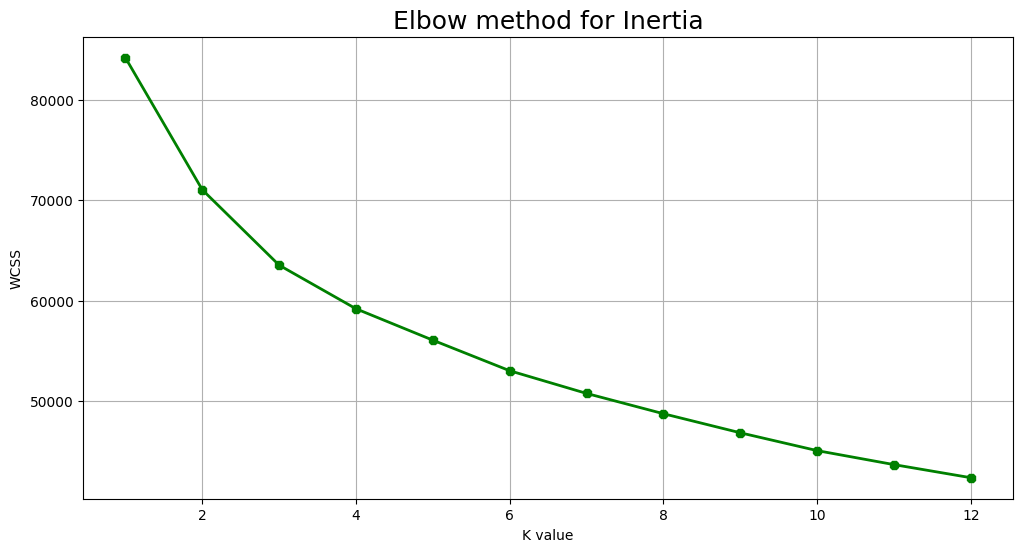

In [ ]:
wcss=[]

for k in range(1,13):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
# plt.plot(X-axis, y-axis, )
plt.plot(range(1,13), wcss, linewidth=2, color='green', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('Elbow method for Inertia', fontsize=18)
plt.show()

We can conclude that if we will take into consideration both Silhouette Score and Inertia(WCSS)thatbest number of clusters for our dataset is 8.

## Apply  K-means with 3 clusters to raw data

In [ ]:
kmeans_1 = KMeans(n_clusters=3, random_state=42)
kmeans_1 = kmeans_1.fit(df_scaled)
inertia_1 = kmeans_1.inertia_
print('The clusters are:  ', kmeans_1.labels_)
print('The Inertia is:   ', kmeans_1.inertia_)

The clusters are:   [2 2 2 ... 0 0 0]
The Inertia is:    63528.685188664705


In the following we will make predictions for new data, with new clusters created. We will first calculate the counts of the cluster and then create a data frame called "countscldf_1". As a last step, we will print the new data frame countscldf_1

In [ ]:
km_label_1 = kmeans_1.predict(df_scaled)

unique, counts1 = np.unique(km_label_1, return_counts=True)
counts1 = counts1.reshape(1,3)

countscldf_1 = pd.DataFrame(counts1, columns= ['Cluster 0', 'Cluster 1','Cluster 2'])

countscldf_1

,Cluster 0,Cluster 1,Cluster 2
0,324,448,308


In [ ]:
silh_score_1 = silhouette_score(df_scaled, km_label_1)
print(f'Silhouette Score(n = 2): {silh_score_1}')

Silhouette Score(n = 2): 0.13953677073154822


### Hierarchical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

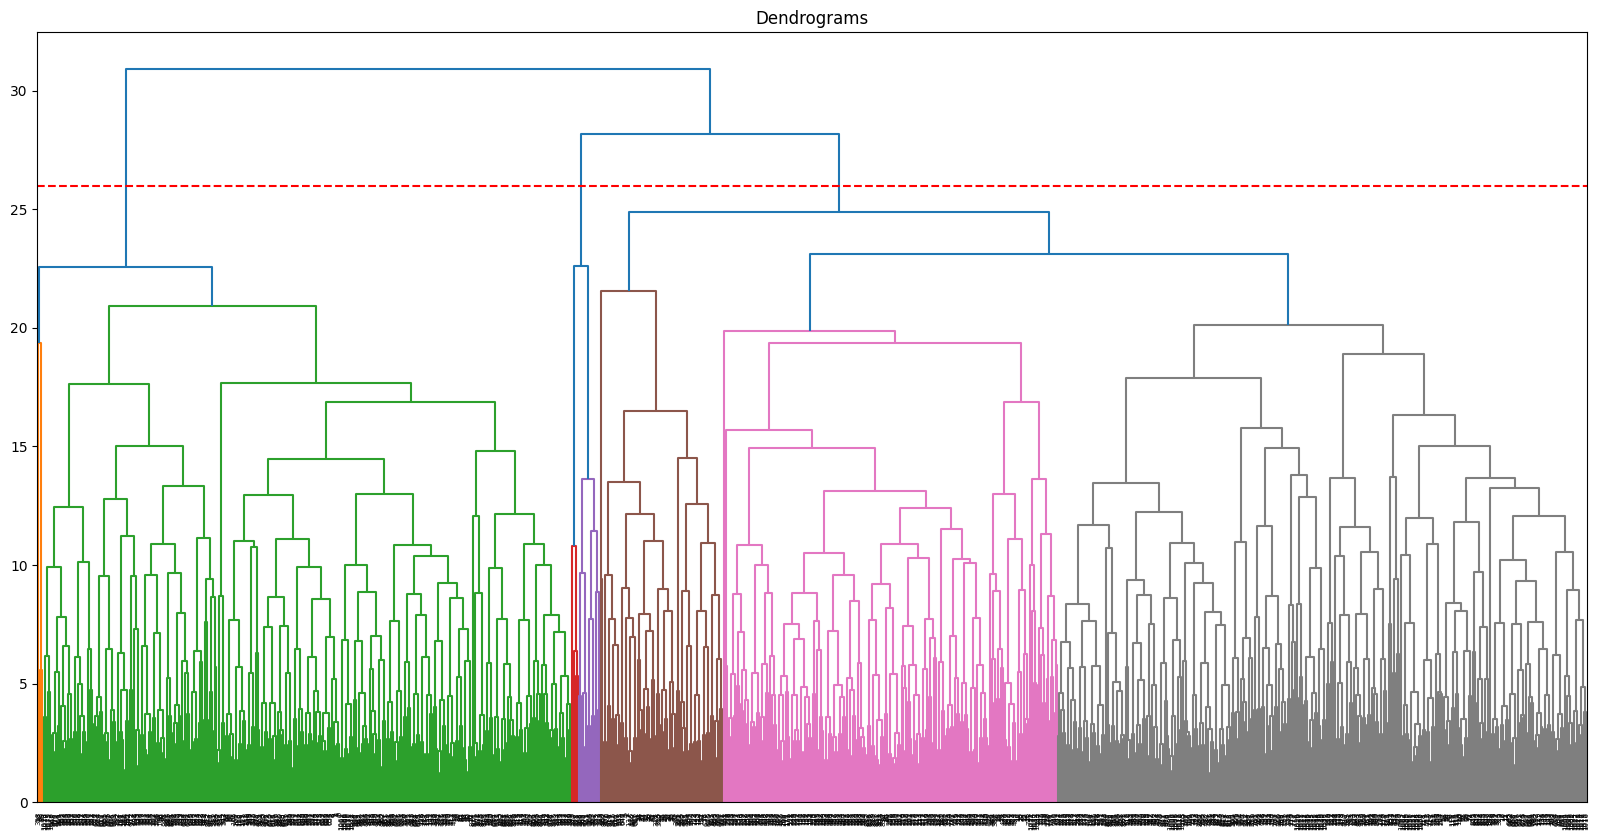

In [ ]:
# Size of the figure
plt.figure(figsize=(20, 10))

# Title of the Dendrogram
plt.title("Dendrograms")

# Call the method dendrogram by using an object (shc)
link = linkage(df_scaled, method = 'complete')
dend = dendrogram(link)

# Draw the red line to cut the dendrogram manullay
plt.axhline(y = 26, color = 'r', linestyle = '--')

In [ ]:
hc_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

hc_1_model = hc_1.fit(df_scaled)

hc_1_labels = hc_1_model.labels_
hc_1_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
silh_score_hc_1 = silhouette_score(df_scaled, hc_1_labels)
print('Silhoette Coefficient for HC_1:',  silh_score_hc_1)

Silhoette Coefficient for HC_1: 0.12216513687936331


### DBSCAN

In [ ]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,0.691475,...,-1.066276,-0.987371,-0.285744,1.065901,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
1,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,0.359831,...,-1.046167,-1.162114,-0.067645,1.280291,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
2,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,0.284600,...,-0.926271,-1.079366,-0.155059,1.857038,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
3,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,0.357061,...,-1.285019,-0.860192,-0.818989,1.144490,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
4,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,0.162107,...,-1.172895,-0.884881,-0.179502,1.583530,0.945905,-0.945905,1.028175,-1.028175,0.945905,-0.945905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.686822,-0.611173,-1.303022,-0.591916,-1.335557,-0.515734,-0.392136,-0.814816,-0.161617,-0.795452,...,-0.400501,2.271885,-1.084095,0.085303,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1076,-0.617165,-0.569084,-1.368405,-0.391978,-1.119256,0.435677,0.024078,-0.792387,0.115758,-0.745716,...,-0.554066,1.939381,-1.066451,0.084215,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1077,-0.791928,-0.883543,-1.723830,-1.627251,-1.742681,-0.300860,-0.756205,-1.196955,-0.842679,-1.168015,...,-0.180275,1.184059,-0.360708,0.293525,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1078,-0.821888,-0.813014,-1.523876,-1.214259,-1.567417,-0.584046,-0.304649,-1.122460,-0.631176,-1.085935,...,0.264492,2.835680,-0.728860,0.208996,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188


In [ ]:
df.corr(method='chi-sq')

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 5)

nbrs = neigh.fit(df_scaled)

distances, indices = nbrs.kneighbors(df_scaled)

print(distances)
print(indices)

[[0.00000000e+00 2.28444650e+00 2.70587450e+00 4.92909148e+00
  5.99471366e+00]
 [2.38418579e-07 1.50218164e+00 2.28444650e+00 3.93139953e+00
  4.43605941e+00]
 [0.00000000e+00 1.50218164e+00 2.70587450e+00 4.27362511e+00
  4.50516535e+00]
 ...
 [0.00000000e+00 3.11287376e+00 3.46162425e+00 4.62450392e+00
  5.39180233e+00]
 [0.00000000e+00 3.46162425e+00 3.58206555e+00 4.11875533e+00
  4.84974794e+00]
 [0.00000000e+00 3.53268604e+00 4.65149840e+00 4.95934813e+00
  5.59049531e+00]]
[[   0    1    2    3    5]
 [   1    2    0    3    4]
 [   2    1    0    3    5]
 ...
 [1077 1074 1078 1075 1076]
 [1078 1077 1074 1075 1076]
 [1079 1076 1075 1078 1071]]


In [ ]:
df_scaled.tail(6)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
1074,-0.782780,-0.770435,-1.311574,-1.235752,-1.499644,-0.563906,-1.151658,-1.046635,-0.774529,-1.027674,...,-0.255484,1.935836,-0.845212,0.260144,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1075,-0.686822,-0.611173,-1.303022,-0.591916,-1.335557,-0.515734,-0.392136,-0.814816,-0.161617,-0.795452,...,-0.400501,2.271885,-1.084095,0.085303,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1076,-0.617165,-0.569084,-1.368405,-0.391978,-1.119256,0.435677,0.024078,-0.792387,0.115758,-0.745716,...,-0.554066,1.939381,-1.066451,0.084215,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1077,-0.791928,-0.883543,-1.723830,-1.627251,-1.742681,-0.300860,-0.756205,-1.196955,-0.842679,-1.168015,...,-0.180275,1.184059,-0.360708,0.293525,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1078,-0.821888,-0.813014,-1.523876,-1.214259,-1.567417,-0.584046,-0.304649,-1.122460,-0.631176,-1.085935,...,0.264492,2.835680,-0.728860,0.208996,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188
1079,-0.494916,-0.621255,-1.268453,-0.589872,-1.341664,0.429124,0.369178,-0.909129,0.339955,-0.782332,...,-0.183757,2.455819,-0.387434,0.104788,-1.057188,1.057188,-0.972598,0.972598,-1.057188,1.057188


In [ ]:
distances

array([[0.00000000e+00, 2.28444650e+00, 2.70587450e+00, 4.92909148e+00,
        5.99471366e+00],
       [2.38418579e-07, 1.50218164e+00, 2.28444650e+00, 3.93139953e+00,
        4.43605941e+00],
       [0.00000000e+00, 1.50218164e+00, 2.70587450e+00, 4.27362511e+00,
        4.50516535e+00],
       ...,
       [0.00000000e+00, 3.11287376e+00, 3.46162425e+00, 4.62450392e+00,
        5.39180233e+00],
       [0.00000000e+00, 3.46162425e+00, 3.58206555e+00, 4.11875533e+00,
        4.84974794e+00],
       [0.00000000e+00, 3.53268604e+00, 4.65149840e+00, 4.95934813e+00,
        5.59049531e+00]])

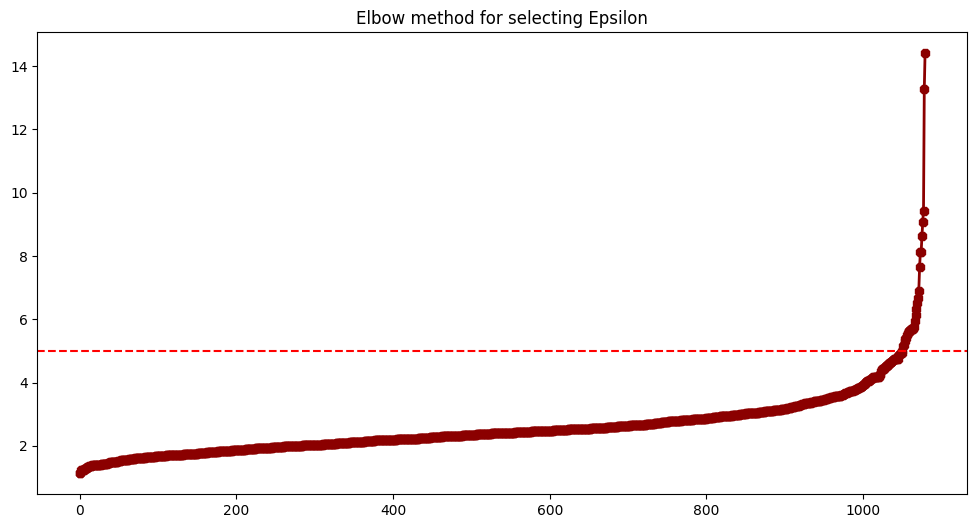

In [ ]:
plt.figure(figsize=(12, 6))
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances, color='darkred', linewidth=2, marker = '8')
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.title('Elbow method for selecting Epsilon')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_opt_1 = DBSCAN(eps = 4)

dbs_model_1 = dbscan_opt_1.fit(df_scaled)

In [ ]:
dbs_labels_1 = dbs_model_1.labels_
dbs_labels_1[:50]

array([-1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2])

In [ ]:
n_clusters_1 = len(set(dbs_labels_1)) - (1 if -1 in dbs_labels_1 else 0)
print('Estimated number of clusters: %d' % n_clusters_1)

Estimated number of clusters: 65


In [ ]:
n_noise_1 = list(dbs_labels_1).count(-1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of noise points:  274


In [ ]:
silh_score_dbs_1 = silhouette_score(df_scaled, dbs_labels_1)
print("Silhoette Coefficient for DBSCAN model 1:",  silh_score_dbs_1)

Silhoette Coefficient for DBSCAN model 1: 0.10637967867418621


### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

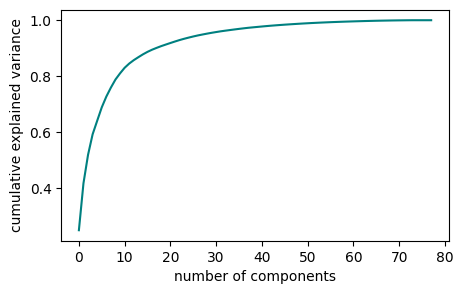

In [ ]:
pca = PCA()
pca.fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(0.80)
pca.fit(df_scaled)
pca.n_components_

10

In [ ]:
pca = PCA(0.39).
pca.fit(df_scaled)
pca.n_components_

2

In [ ]:
pca = PCA(n_components=6, random_state=42)
df_pca_1 = pca.fit(df_scaled).transform(df_scaled)

kmeans_2 = KMeans(n_clusters=8, random_state=42)
kmeans_2 = kmeans_2.fit(df_pca_1)
inertia_2 = kmeans_2.inertia_
print('The clusters are:  ', kmeans_2.labels_)
print('The Inertia is:   ', kmeans_2.inertia_ )

The clusters are:   [3 3 3 ... 6 6 6]
The Inertia is:    24325.231323405445


In [ ]:
km_label_2 = kmeans_2.predict(df_pca_1)

silh_score_2 = silhouette_score(df_pca_1, km_label_2)
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca_1, km_label_2)}')

Silhouette Score(n = 2): 0.20494298393085975


In [ ]:
unique, counts2 = np.unique(km_label_2, return_counts=True)
counts2 = counts2.reshape(1,8)


countscldf_2 = pd.DataFrame(counts2, columns= ['Cluster 0', 'Cluster 1','Cluster 2', 'Cluster 3',
                                            'Cluster 4', 'Cluster 5','Cluster 6', 'Cluster 7'])


countscldf_2

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,206,89,182,117,115,163,92,116
